In [14]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [15]:
X,y = make_regression(n_samples=100, n_features = 1, n_informative=1, n_targets=1, noise = 20, random_state = 13)

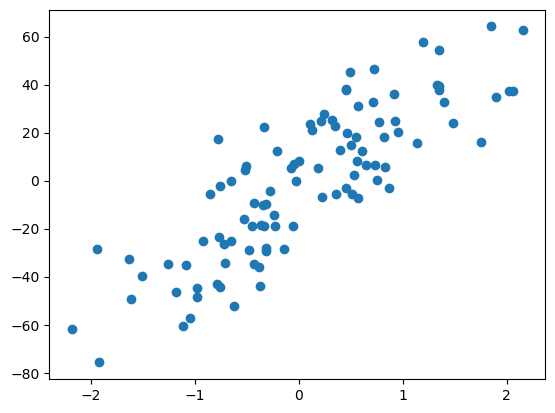

In [16]:
plt.scatter(X,y)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [19]:
from sklearn.linear_model import Ridge

In [20]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [21]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


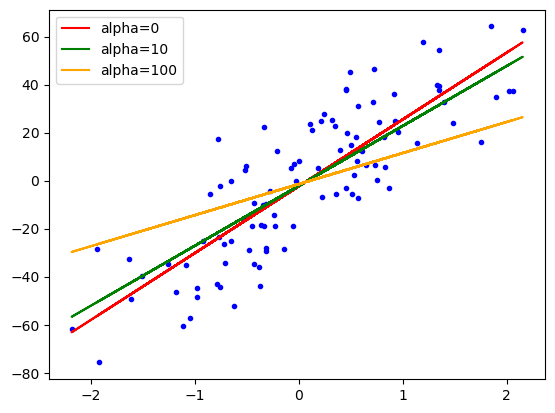

In [22]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X), color='red', label='alpha=0')
plt.plot(X,rr.predict(X), color='green', label='alpha=10')
plt.plot(X,rr1.predict(X), color='orange', label='alpha=100')
plt.legend()

In [32]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()) 
            
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
        
    def predict(X_test):
        pass

In [35]:
reg = MeraRidge(alpha=100)

In [36]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


## Ridge Regression for n-D data

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [38]:
X,y = load_diabetes(return_X_y = True)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [41]:
from sklearn.linear_model import Ridge

In [42]:
reg = Ridge(alpha=0.1, solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [43]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4693128853309805

In [44]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [50]:
class MeraRidgenD:
        
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        I = np.identity(X_train.shape[1])
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]                                                                                    
    
    def predict(self,X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
        

In [51]:
reg1 = MeraRidgenD()
reg1.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808
